# Regression Models

[Link Dataset Kaggle:](https://www.kaggle.com/datasets/abdulmalikkahil98/wattage-of-wind-turbines)

## 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
#Loading Data
df = pd.read_csv("Data.csv")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
df.shape

(9568, 5)

In [4]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

- No missing values

### Models to use
- LinearRegression
- DecissionTree
- RandomForest
- SVR

## 2. Spliting the data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#Split the data
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [8]:
#We create a function to save in a DF the results of r2_score
def score(nombre_modelo, modelo):
    y_pred=modelo.predict(X_test)
    score = pd.DataFrame({"Modelo":nombre_modelo,
              "Score":[r2_score(y_test, y_pred)]})
    return score    

## 3. Model

### 3.1 Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
result = score("LR", lr)

### 3.2 DecisionTree

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [14]:
results=pd.concat([result, score("DT", dt)])

### 3.3 RandomForestRegressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
#Selecting the best estimator
r2 = []
for r in range(1,11,1):
    rf = RandomForestRegressor(n_estimators = r, random_state=0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    r2.append(r2_score(y_test, y_pred))    

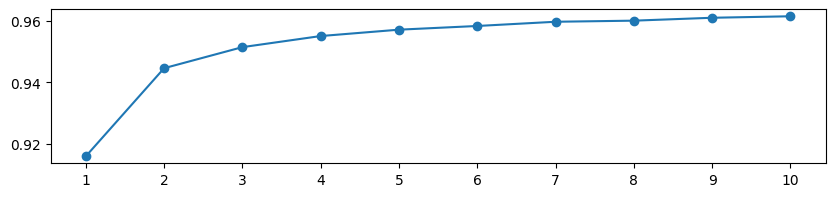

In [17]:
plt.figure(figsize=(10,2))
plt.plot(range(1,11,1), r2, marker="o")
plt.xticks(range(1,11,1))
plt.show()

- We can observe that the best estimator is 10

In [18]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [19]:
results = pd.concat([results, score("RF", rf)])

### 3.4 Support Vector Regression

In [20]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [21]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_stand = sc_X.fit_transform(X)
y_stand = sc_y.fit_transform(y)

In [22]:
svr = SVR(kernel="rbf")

In [23]:
svr.fit(X_stand, y_stand)

SVR()

In [24]:
y_pred=sc_y.inverse_transform(svr.predict(sc_X.transform(X_test)).reshape(-1,1))

In [25]:
results=pd.concat([results,pd.DataFrame({"Modelo":"SVR",
              "Score":[r2_score(y_test, y_pred)]})])

In [26]:
results=results.sort_values(by="Score", ascending=False)
results

,Modelo,Score
0,RF,0.961591
0,SVR,0.949959
0,LR,0.932532
0,DT,0.923071


### Great, we can see that the winning model is Random Forest.